In [1]:
# PROBLEM 1
#
# This problem involves two tasks. 
# First, modify the acceleration function 
# to compute the acceleration of the 
# pendulum depending on its position.
# 
# Second, introduce the initial conditions
# described in the video. We want the initial conditions
# to form an ellipse in phase space. The center of
# that ellipse is at x = 2 m and v = 0 m/s. Its semiaxis
# in x direction has a length of 0.25 m, its semiaxis
# in v direction has a length of 2 m/s.
#
# Third, execute the Symplectic Euler Method.
#
# Please note that the order in which you 
# generate your initial conditions matters
# for grading purposes.  Have your first 
# (x, v) coordinate pair be the right-most
# point on the green ellipse, and progress
# counter-clockwise from there.
#

import math
from udacityplots import *
import numpy
import numpy as np
import matplotlib.pyplot as plt

h = 0.05 # s
g = 9.81 # m / s2
length = 1. # m
gravity_vector = acceleration_vector = force = np.array([0, -9.81]) # negative because it is pointing downwards


<tr>
<td> <img src="media/pendulum.jpg" alt="Drawing" style="width: 450px;"/> </td>
<td> <img src="media/radians.png" alt="Drawing" style="width: 450px;"/> </td>
</tr>


Sources:  
https://courses.lumenlearning.com/physics/chapter/16-4-the-simple-pendulum/  
https://www.1728.org/radians.htm


In [22]:
def acceleration(position):
    angle = position / length
    acceleration = -g * math.sin(angle)
    return acceleration

acceleration(0.1)

-0.9793658173053843

In [20]:
def acceleration(position):
    theta = position / length
    return -g * math.sin(theta)
    

In [24]:
def acceleration(position):
    return -g * math.sin(position / length)



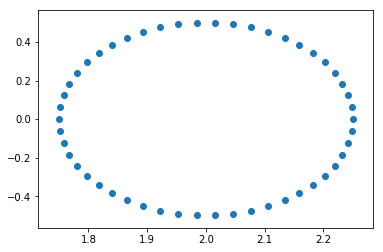

In [3]:
# inital conditions explanation

num_initial_conditions = 50
xt = np.zeros(50)
vt = np.zeros(50)

for i in range(num_initial_conditions):
    phi = 2. * math.pi * i / num_initial_conditions
    xt[i] = 2 + .25*math.cos(phi)
    vt[i] = 2 * .25*math.sin(phi)

plt.scatter(xt, vt)

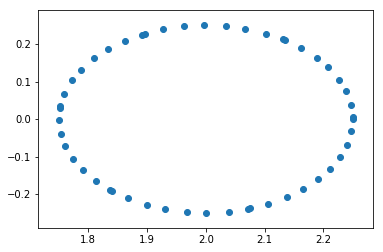

In [14]:
# inital conditions explanation

num_initial_conditions = 50
xt = np.zeros(50)
vt = np.zeros(50)

for i in range(num_initial_conditions):
    phi = i
    xt[i] = 2 + .25*math.cos(phi)
    vt[i] = .25*math.sin(phi)

plt.scatter(xt, vt)

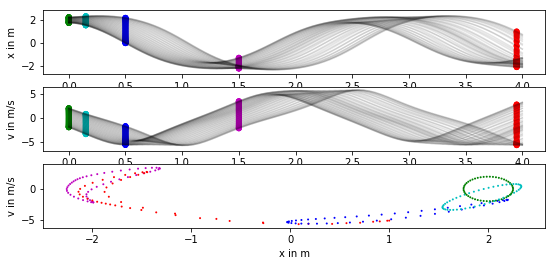

(array([ 2.24802868,  2.23549535,  2.20365834,  2.15204589,  2.079936  ,
         1.98641176,  1.87045038,  1.73105687,  1.56745263,  1.37932353,
         1.16711762,  0.93235797,  0.67790408,  0.40806904,  0.12850156,
        -0.15420876, -0.43315207, -0.70180142, -0.95461756, -1.18741903,
        -1.39747584, -1.58337511, -1.74475131, -1.88197264, -1.99584681,
        -2.08737827, -2.15758494, -2.20736907, -2.23743172, -2.24822001,
        -2.23989866, -2.21234043, -2.16513343, -2.09760698, -2.00888076,
        -1.89794553, -1.76378605, -1.60555688, -1.42281752, -1.21582119,
        -0.98582887, -0.73538931, -0.46849653, -0.1905296 ,  0.09208185,
         0.37243818,  0.64387018,  0.90057993,  1.13806975,  1.35329514,
         1.54457335,  1.711335  ,  1.85381344,  1.97274255,  2.06910127,
         2.14391739,  2.19812728,  2.23248181,  2.24748715,  2.24337159,
         2.22007209,  2.17723789,  2.11425196,  2.03027441,  1.9243155 ,
         1.79534822,  1.64247166,  1.46513306,  1.2

In [25]:
@show_plot
def symplectic_euler(): 
    axes_x = matplotlib.pyplot.subplot(311)
    axes_x.set_ylabel('x in m')
    axes_v = matplotlib.pyplot.subplot(312)
    axes_v.set_ylabel('v in m/s')
    axes_v.set_xlabel('t in s')
    axes_phase_space = matplotlib.pyplot.subplot(313)
    axes_phase_space.set_xlabel('x in m')
    axes_phase_space.set_ylabel('v in m/s')
    num_steps = 80
    x = numpy.zeros(num_steps + 1) # m around circumference
    v = numpy.zeros(num_steps + 1) # m / s
    colors = [(0, 'g'), (3, 'c'), (10, 'b'), (30, 'm'), (79, 'r')]
    times = h * numpy.arange(num_steps + 1)

    num_initial_conditions = 50

    for i in range(num_initial_conditions):
        phi = 2. * math.pi * i / num_initial_conditions
        x[0] = 2. + 0.25 * math.cos(phi)
        v[0] = 2. * math.sin(phi)
        
        for step in range(num_steps):
            x[step + 1] = x[step] + h * v[step]
            v[step + 1] = v[step] + h * acceleration(x[step+1])
        
        # Don't worry about this part of the function. It's just for making 
        # the plot look a bit nicer.
        axes_x.plot(times, x, c = 'k', alpha = 0.1)
        axes_v.plot(times, v, c = 'k', alpha = 0.1)        
        for step, color in colors:
            # matplotlib.pyplot.hold(True)
            axes_x.scatter(times[step], x[step], c = color, edgecolors = 'none')
            axes_v.scatter(times[step], v[step], c = color, edgecolors = 'none')        
            axes_phase_space.scatter(x[step], v[step], c = color, edgecolors = 'none', s = 4)

    return x, v

symplectic_euler()

In [34]:
np.linalg.norm((v[0] + h * acceleration(x[1])))

0.2940007465920131